Text(0, 0.5, 'Height')

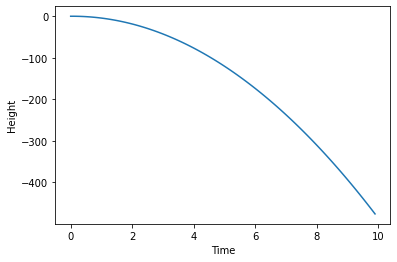

In [1]:
#1D projectile using euler

import numpy as np
import matplotlib.pyplot as plt
#eulers method
t_max = 10 # maximum time
dt = 0.1 # time step
g = -9.81
n_steps = int(t_max/ dt)
t = np.zeros(n_steps)
v = np.zeros(n_steps)
x = np.zeros(n_steps)
height = np.zeros(n_steps)
# set initial conditions
t[0] = 0
v[0] = 0

for i in range(1,n_steps):
    t[i] = t[i-1] + dt
    v[i] = v[i-1] + dt * g

#integration
x[i] = x[i-1] +  dt*v[i-1]

for i in range(1,n_steps):
    t[i] = t[i-1] + dt
    v[i] = v[i-1] + dt * g
    x[i] = x[i-1] + dt * v[i-1]

for i in range(1,n_steps):
    height[i]=x[-i]

plt.plot(t,x)
plt.xlabel("Time")
plt.ylabel("Height")

Text(0, 0.5, 'y')

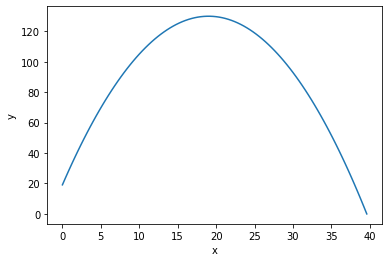

In [7]:
#2D plot of a projectile using euler
import numpy as np
import matplotlib.pyplot as plt
#eulers method
t_max = 10 # maximum time
dt = 0.1 # time step
g = -9.81 #a_y
a = 0 #a_x
u_0 = 4 #x direction initial velocity
v_0 = 50 #y direction initial velocity
n_steps = int(t_max/ dt)
t = np.zeros(n_steps)
v = np.zeros(n_steps)
y = np.zeros(n_steps)
u = np.zeros(n_steps)
x = np.zeros(n_steps)
# set initial conditions
t[0] = 0
u[0] = u_0
v[0] = v_0

#integration
for i in range(1,n_steps):
    t[i] = t[i-1] + dt
    v[i] = v[i-1] + dt * g
    y[i] = y[i-1] + dt * v[i-1]
    u[i] = u[i-1] + dt * a
    x[i] = x[i-1] + dt * u[i-1]

x = x[::-1]

plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
#by calculator height is 127m, and by visual inspection it is approx 125-130m

In [ ]:
# A sample differential equation "dy / dx = (x - y)/2"
#v_x and v_y are intial conditions
#r=,orbital radius,G=,m=,
def dydx(t, Y):
	return [dydx(t,x),dydx(t,y),-G*m*x/(r*r*r),-G*m*y/(r*r*r)]

# Finds value of y for a given x using step size h
# and initial value y0 at x0.
def rungeKutta(Y0, t,t0, h):
	# Count number of iterations using step size or
	# step height h
	n = (int)((t - t0)/h)
	# Iterate for number of iterations
	Y = Y0
	for i in range(1, n + 1):
		"Apply Runge Kutta Formulas to find next value of y"
		k1 = h * dydx(t0, Y)
		k2 = h * dydx(t0 + 0.5 * h, Y + 0.5 * k1)
		k3 = h * dydx(t0 + 0.5 * h, Y + 0.5 * k2)
		k4 = h * dydx(t0 + h, Y + k3)

		# Update next value of y
		Y = Y + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)

		# Update next value of x
		t0 = t0 + h
	return Y

# Driver method
t0 = 0
Y0 = [149*109*1000,0,5,8]
t = 2
h = 0.2
print ('The value of y at x is:', rungeKutta(Y0, t,t0, h))

#Y=[x,y,v_x,v_y]

In [ ]:
#eulers method
# Import needed modules
from pylab import *
G = 4*pi**2	# define G.

## Set initial position and speed of satellite.
M  = 1.0	# mass of the central mass

# give info to help user decide on initial conditions 
Ro = 1.0	# Radius of the orbit 
v =sqrt(G*M/Ro)	# v assuming circular orbit
print("For circular orbit of r = %g, and v = %g." % (Ro,v)) 

# prompt user for initial conditions and times
x0 = input('Initial radius: ')
vy0 = input('Initial tangential velocity: ')
y0 = 0.
vx0 = 0.

t0 = 0.
tf = input("Enter final time: ")
tau = input("Enter time step: ")

## Create arrays needed to store the results for plotting
x_plt = array([x0])
y_plt = array([y0])
vx_plt = array([vx0])
vy_plt = array([vy0])
t_plt = array([t0])

## Execute Euler method
# set starting points for iteration to initial conditions
x_old = x0	
y_old = y0
vx = vx0
vy = vy0
t = t0	# set starting time to 0

while (t < tf):
	x = x_old + vx*tau        # implement Euler step
	y = y_old + vy*tau
	r = sqrt(x**2 + y**2)
	vx = vx - tau*(G*M*x)/r**3
	vy = vy - tau*(G*M*y)/r**3
	
	x_plt = append(x_plt,x)   # Append new points to the arrays
	y_plt = append(y_plt,y)
	vx_plt = append(vx_plt,vx)
	vy_plt = append(vy_plt,vy)
	t_plt = append(t_plt,t)
	
	x_old = x    # Update x_old and y_old for next Euler step
	y_old = y
	t = t + tau  # Increment time

## Plot the results
figure(1)
clf()

# Plot the orbit
subplot(2,1,1) # subplot() lets you put 
               # multiple plots on a single page

title(r'Euler Method with $x$ = %g, $v_y$ = %g, and $\tau$ = %g' \
      % (x0,vy0,tau))
plot(x_plt,y_plt)

centerx = 0.    # plot the position of the center of mass
centery = 0.
plot(centerx,centery,'ko')
axis('equal')   # make axis scales equal so circular orbits look circular

## Plot the energy
subplot(2,1,2)
eps = 0.5*(vx_plt**2 + vy_plt**2) - G*M/sqrt(x_plt**2 + y_plt**2)
plot(t_plt,eps)
eps_plot_min = 1.1*min(eps)
axis([min(t_plt),max(t_plt),eps_plot_min,0])
xlabel('t')
ylabel('E/m')
show()